#Fully Connected Neural Network

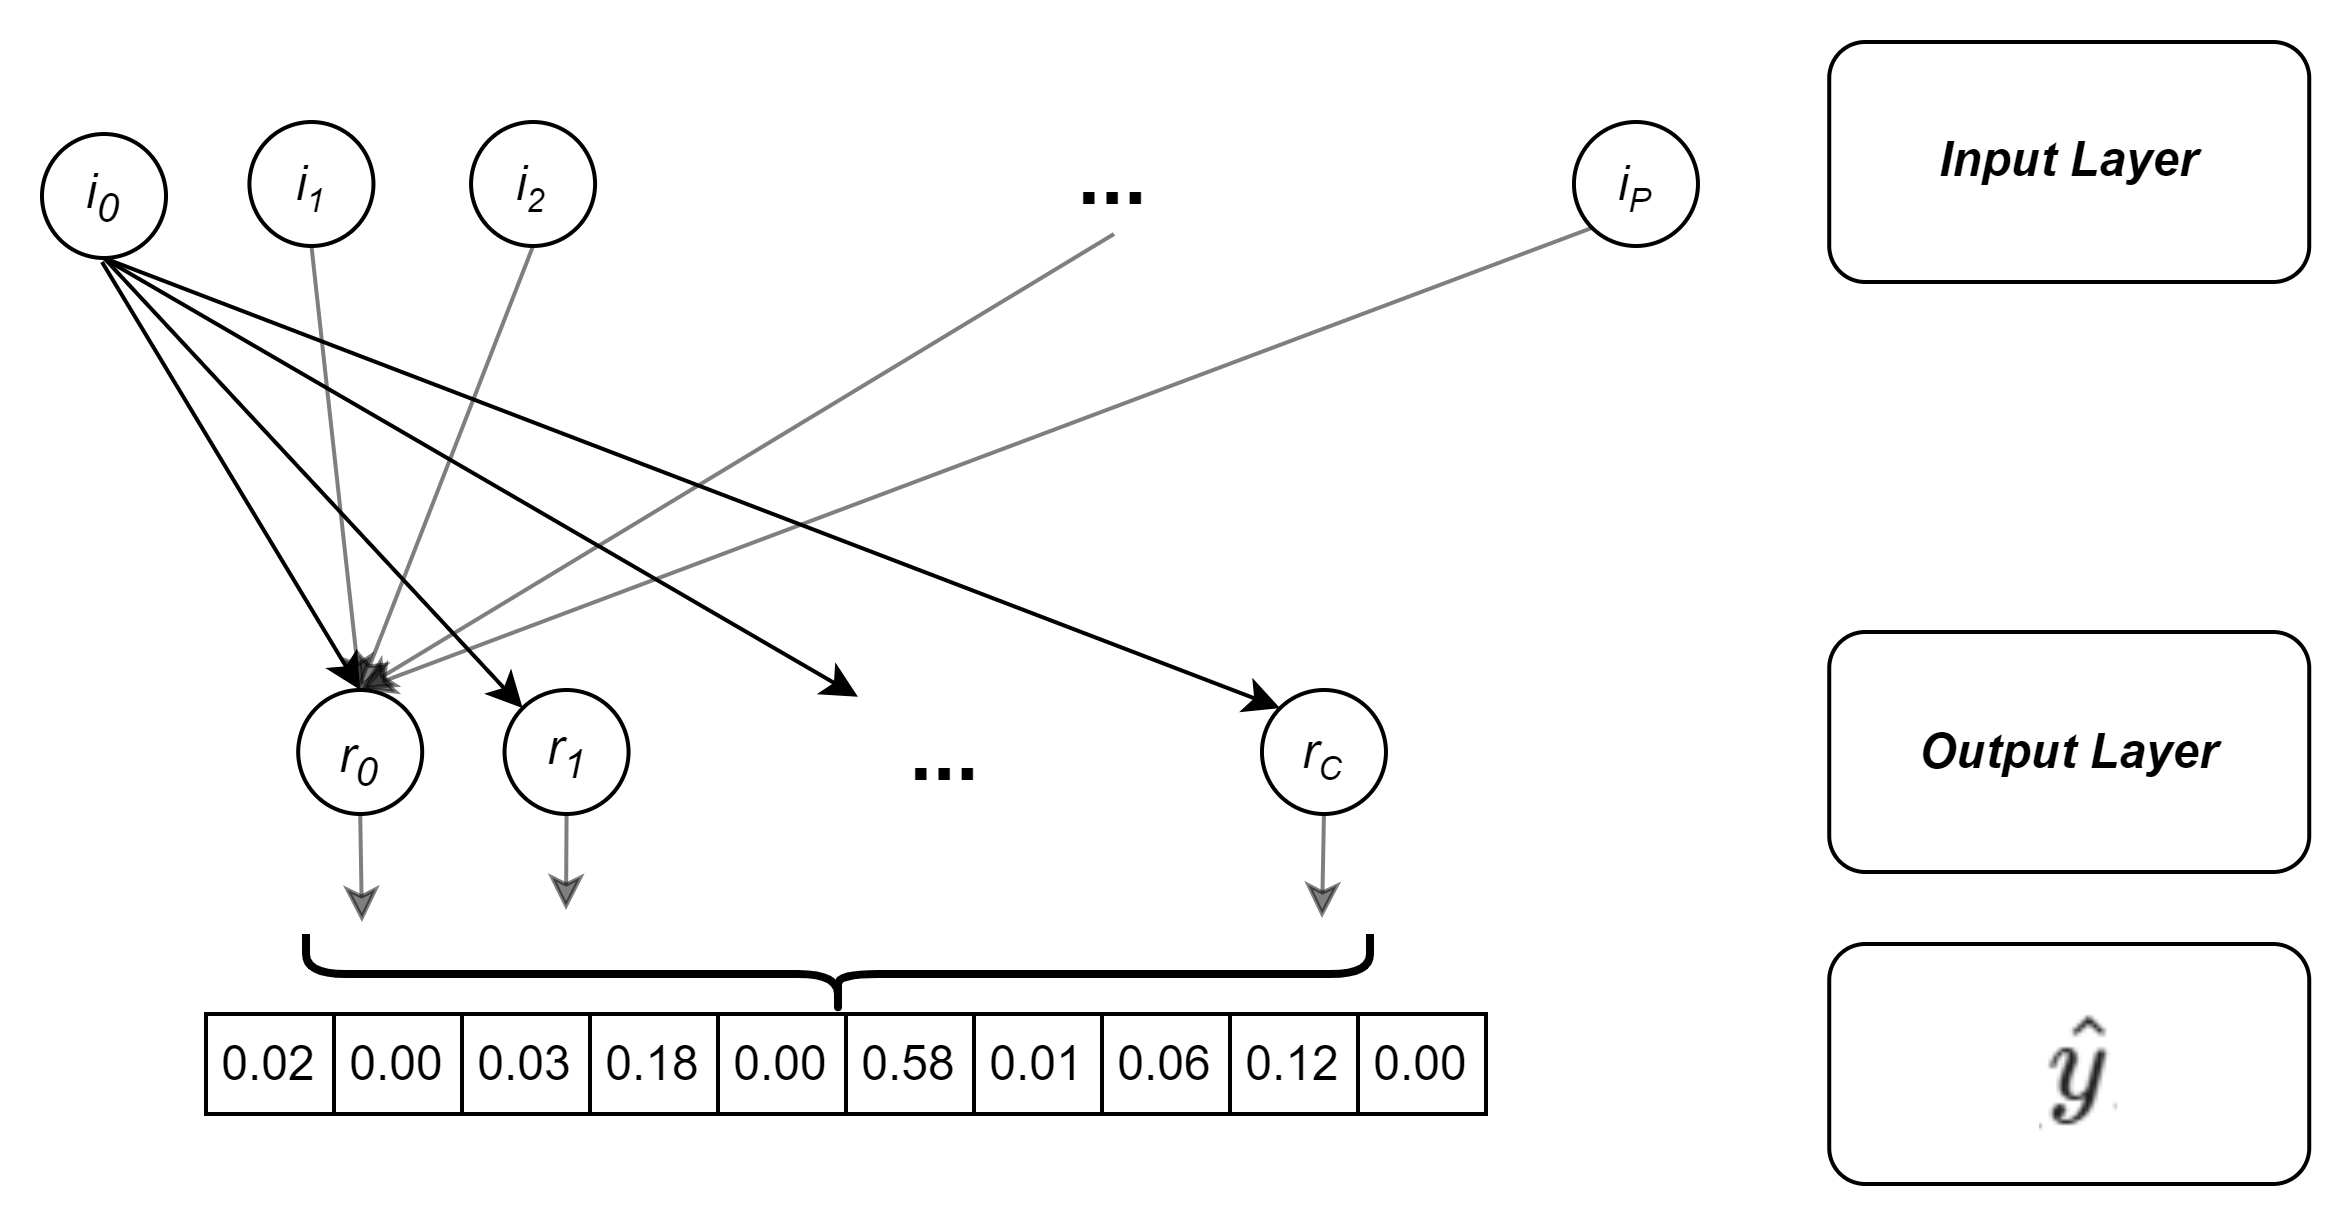

We will build a basic FCNN using Keras, which is a powerful and easy-to-use Python library for developing and evaluating deep learning models. It wraps the efficient numerical computation libraries Theano, CNTK and TensorFlow and allows you to define and train neural network models in a few short lines of code. In this tutorial you will discover how to create your first neural network model in Python using Keras. After completing this lesson you will know:


*   How to load a dataset for use with Keras.
*   How to define and compile a Multilayer Perceptron model in Keras.
*   How to evaluate a Keras model on a validation dataset.



# Load Libraries

First step is to load the required libraries.

In [1]:
import numpy

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import mnist

# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.

The MNIST data is split into three parts: $60,000$ data points of training data, and $10,000$ points of test data. Each image is 28 pixels by 28 pixels.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

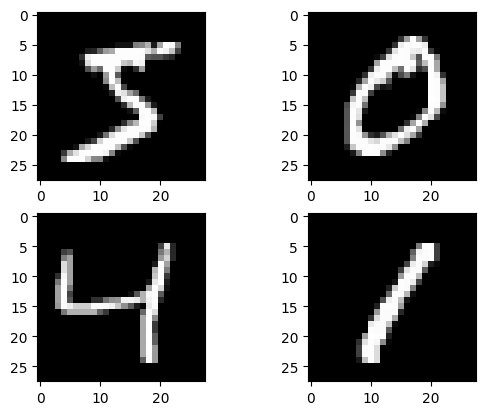

In [7]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Formatting Data and Labels for Keras

We can flatten this array into a vector of $28\times28 = 784$ numbers. It doesn't matter how we flatten the array, as long as we're consistent between images. From this perspective, the MNIST images are just a bunch of points in a 784-dimensional vector space. The data should always be of the format (Number of data points, data point dimension). In this case the training data will be of format $60,000\times784$.
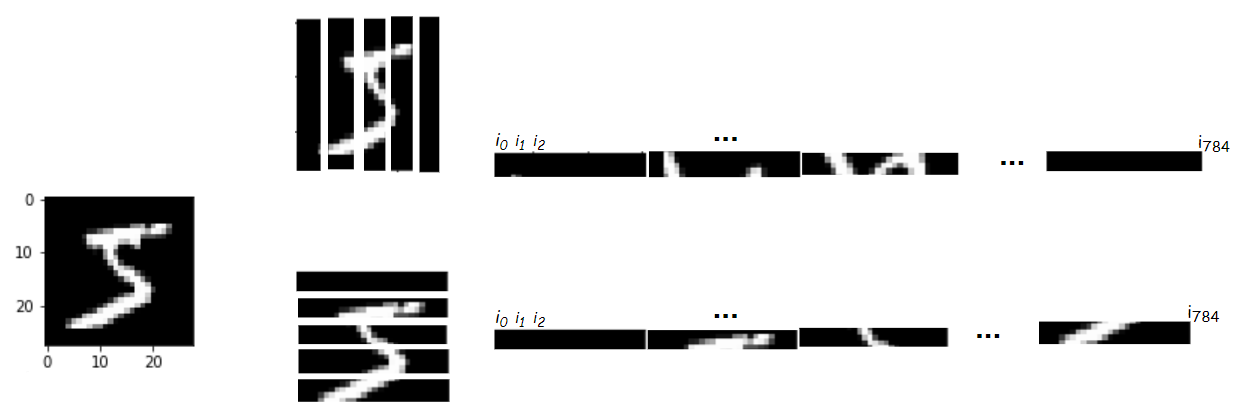



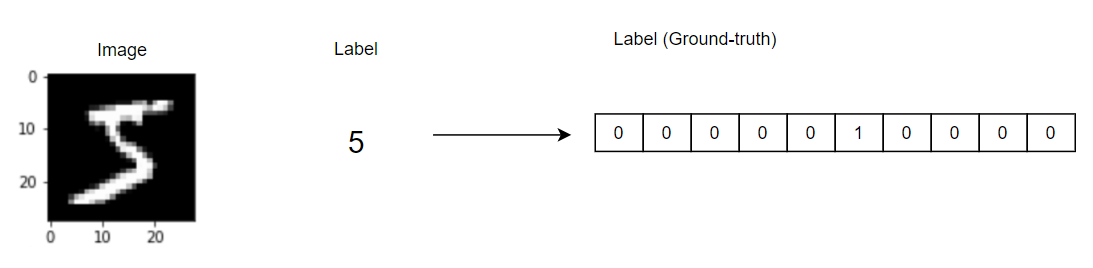

In [8]:
num_pixels = X_train.shape[1] * X_train.shape[2]

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

X_train = X_train / 255

X_test = X_test / 255

y_train = to_categorical(y_train)

y_test = to_categorical(y_test)

num_classes = y_test.shape[1]

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test.shape

(10000, 784)

In [11]:
y_train.shape

(60000, 10)

In [12]:
y_test.shape

(10000, 10)

# Defining a single layer neural network model

Here we will define a single layer neural network. It will have a input layer of $784$ neurons, i.e. the input dimension and output layer of $10$ neurons, i.e. number of classes. The activation function used will be softmax activation.

In [13]:
# create model

model = Sequential()   # 784 10

model.add(Dense(num_classes, input_dim=num_pixels, activation='softmax'))


# Compiling the model

Once the model is defined, we have to compile it. While compiling we provide the loss function to be used, the optimizer and any metric. Here we will use crossentropy loss with Adam optimizer and accuracy as a metric.

In [14]:
# Compile model

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])


# Training/Fitting the model

Now the model is ready to be trained. We will provide training data to the network. Also we will specify the validation data, over which the model will only be validated.

In [16]:
# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4383 - accuracy: 0.8840 - val_loss: 0.4129 - val_accuracy: 0.8916
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.8857 - val_loss: 0.4044 - val_accuracy: 0.8940
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.8876 - val_loss: 0.3973 - val_accuracy: 0.8957
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4138 - accuracy: 0.8891 - val_loss: 0.3907 - val_accuracy: 0.8976
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.4074 - accuracy: 0.8908 - val_loss: 0.3848 - val_accuracy: 0.8994
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4017 - accuracy: 0.8917 - val_loss: 0.3798 - val_accuracy: 0.9005
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3965 - accuracy: 0.8924 - val_loss: 0.3751 - val_accuracy: 0.9016
Epoch 

# Evaluating the model

Finally we will evaluate the model on the testing dataset.

In [17]:
# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3636 - accuracy: 0.9041
Baseline Error: 9.59%


# Defining a deep model

Now we will define a deeper neural network in which we will add $3$ hidden layers having $500$, $100$, and $50$ neurons.

In [ ]:
model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='relu'))

model.add(Dense(100, activation='relu'))

model.add(Dense(50, activation = 'relu'))  # relu tanh   prelu  lrelu

model.add(Dense(num_classes, activation='softmax'))


In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

# Final evaluation of the model

print('\n Testing the model \n')

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 3s 5ms/step - loss: 0.2844 - accuracy: 0.9163 - val_loss: 0.1271 - val_accuracy: 0.9621
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.1020 - accuracy: 0.9692 - val_loss: 0.0990 - val_accuracy: 0.9696
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0654 - accuracy: 0.9801 - val_loss: 0.0837 - val_accuracy: 0.9743
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0724 - val_accuracy: 0.9770
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0332 - accuracy: 0.9898 - val_loss: 0.0691 - val_accuracy: 0.9783
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0777 - val_accuracy: 0.9787
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0215 - accuracy: 0.9928 - val_loss: 0.0702 - val_accuracy: 0.9791
Epoch 

# Analyzing Model Summary

The following function provides us with detailed summary of the model. We can use it after we have defined
our model.

In [ ]:
model.summary()  # 784*500+500

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               392500    
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 10)                510       
                                                                 
Total params: 448,160
Trainable params: 448,160
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import h5py

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training model

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

model.save_weights('FC.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 [==============================] - 3s 4ms/step - loss: 0.0150 - accuracy: 0.9949 - val_loss: 0.0814 - val_accuracy: 0.9805
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0110 - accuracy: 0.9964 - val_loss: 0.0861 - val_accuracy: 0.9810
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0124 - accuracy: 0.9959 - val_loss: 0.0966 - val_accuracy: 0.9771
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0088 - accuracy: 0.9970 - val_loss: 0.0880 - val_accuracy: 0.9797
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0815 - val_accuracy: 0.9815
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0101 - accuracy: 0.9967 - val_loss: 0.0947 - val_accuracy: 0.9799
Epoch 7/10
300/300 [==============================] - 1s 5ms/step - loss: 0.0094 - accuracy: 0.9968 - val_loss: 0.0995 - val_accuracy: 0.9787
Epoch 

# Loading the saved model

In [ ]:


model = Sequential()

model.add(Dense(500, input_dim=num_pixels, activation='sigmoid'))

model.add(Dense(100, activation='sigmoid'))

model.add(Dense(50, activation = 'sigmoid'))

model.add(Dense(num_classes, activation='softmax'))

# Compile model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 2.3924 - accuracy: 0.1032
Baseline Error: 89.68%


In [ ]:
model.load_weights('FC.h5')

# Final evaluation of the model

scores = model.evaluate(X_test, y_test)

print("Baseline Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 2.1096 - accuracy: 0.1756
Baseline Error: 82.44%


# Creating checkpoints of model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath='FC1.h5'
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', save_best_only=True, mode='max')
filepath='FC2.h5'
checkpoint2 = ModelCheckpoint(filepath, monitor='val_loss', save_best_only=True, mode='min')
callbacks_list = [checkpoint1,checkpoint2]
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, callbacks=callbacks_list)

Epoch 1/10
300/300 [==============================] - 3s 6ms/step - loss: 0.4882 - accuracy: 0.9280 - val_loss: 0.1726 - val_accuracy: 0.9622
Epoch 2/10
300/300 [==============================] - 1s 4ms/step - loss: 0.1184 - accuracy: 0.9739 - val_loss: 0.0978 - val_accuracy: 0.9748
Epoch 3/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0660 - accuracy: 0.9853 - val_loss: 0.0731 - val_accuracy: 0.9799
Epoch 4/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0431 - accuracy: 0.9899 - val_loss: 0.0678 - val_accuracy: 0.9812
Epoch 5/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9939 - val_loss: 0.0573 - val_accuracy: 0.9827
Epoch 6/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0215 - accuracy: 0.9958 - val_loss: 0.0558 - val_accuracy: 0.9835
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.0156 - accuracy: 0.9971 - val_loss: 0.0574 - val_accuracy: 0.9839
Epoch 